# C3BO: Cancer Blood Oncologist

### Necessary Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import glob
import os

from skimage.io import imread, imshow

from skimage.transform import resize
from sklearn.utils import shuffle
from tqdm import tqdm

import tkinter as tk
import PIL
from PIL import Image, ImageTk
from tkinter import filedialog


import tensorflow as tf
import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Conv2D,MaxPool2D,BatchNormalization,Dropout,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

### File Handling

In [2]:
train_dataset_0_all = glob.glob('C-NMC_Leukemia/training_data/fold_0/all/*.bmp')
train_dataset_0_hem = glob.glob('C-NMC_Leukemia/training_data/fold_0/hem/*.bmp')
train_dataset_1_all = glob.glob('C-NMC_Leukemia/training_data/fold_1/all/*.bmp')
train_dataset_1_hem = glob.glob('C-NMC_Leukemia/training_data/fold_1/hem/*.bmp')
train_dataset_2_all = glob.glob('C-NMC_Leukemia/training_data/fold_2/all/*.bmp')
train_dataset_2_hem = glob.glob('C-NMC_Leukemia/training_data/fold_2/hem/*.bmp')

In [3]:
print(imread(train_dataset_0_all[0]).shape)

(450, 450, 3)


In [4]:
train = ImageDataGenerator(rescale=1./255)
validation = ImageDataGenerator(rescale=1./255)

In [5]:
train_dataset = train.flow_from_directory('C-NMC_Leukemia/training_data/fold_0',
                                         target_size=(200, 200),
                                         batch_size=10,
                                         class_mode="binary")

Found 3527 images belonging to 2 classes.


In [6]:
labels_df = pd.read_csv("C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv")
labels_df

,Patient_ID,new_names,labels
0,UID_57_29_1_all.bmp,1.bmp,1
1,UID_57_22_2_all.bmp,2.bmp,1
2,UID_57_31_3_all.bmp,3.bmp,1
3,UID_H49_35_1_hem.bmp,4.bmp,0
4,UID_58_6_13_all.bmp,5.bmp,1
...,...,...,...
1862,UID_54_33_1_all.bmp,1863.bmp,1
1863,UID_55_24_1_all.bmp,1864.bmp,1
1864,UID_H32_20_1_hem.bmp,1865.bmp,0
1865,UID_54_30_2_all.bmp,1866.bmp,1


In [7]:
valid_dataset = validation.flow_from_directory('C-NMC_Leukemia/training_data/fold_1',
                                         target_size=(200, 200),
                                         batch_size=10,
                                         class_mode="binary")

Found 3581 images belonging to 2 classes.


### Constructing the CNN Classifier

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation="relu"),
    
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [9]:
model.compile(loss="binary_crossentropy",
             optimizer=RMSprop(lr=0.001),
             metrics=["accuracy"])

In [10]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch=5,
                     epochs=50,
                     validation_data=valid_dataset)


Epoch 1/50
5/5 [==============================] - 70s 17s/step - loss: 1.1231 - accuracy: 0.4231 - val_loss: 0.6039 - val_accuracy: 0.7294
Epoch 2/50
5/5 [==============================] - 49s 12s/step - loss: 0.6101 - accuracy: 0.6747 - val_loss: 0.4986 - val_accuracy: 0.6931
Epoch 3/50
5/5 [==============================] - 50s 12s/step - loss: 0.5509 - accuracy: 0.6914 - val_loss: 0.4520 - val_accuracy: 0.8246
Epoch 4/50
5/5 [==============================] - 50s 12s/step - loss: 0.6756 - accuracy: 0.6675 - val_loss: 0.4868 - val_accuracy: 0.7464
Epoch 5/50
5/5 [==============================] - 50s 12s/step - loss: 0.6873 - accuracy: 0.6500 - val_loss: 0.4342 - val_accuracy: 0.8319
Epoch 6/50
5/5 [==============================] - 60s 15s/step - loss: 0.3962 - accuracy: 0.8450 - val_loss: 0.4921 - val_accuracy: 0.8218
Epoch 7/50
5/5 [==============================] - 51s 13s/step - loss: 0.5908 - accuracy: 0.7328 - val_loss: 0.4191 - val_accuracy: 0.8280
Epoch 8/50
5/5 [===========

In [11]:
model_fit.history["loss"]

[1.0469669103622437,
 0.5914564728736877,
 0.5663458108901978,
 0.6104210615158081,
 0.6115512847900391,
 0.3406863510608673,
 0.6014813184738159,
 0.2993161082267761,
 0.478984534740448,
 0.477760910987854,
 0.45856723189353943,
 0.4467586576938629,
 0.7124108076095581,
 0.4848019480705261,
 0.3682847321033478,
 0.6093093156814575,
 0.4622076451778412,
 0.5434808135032654,
 0.4631587266921997,
 0.4059748947620392,
 0.7068912982940674,
 0.48794955015182495,
 0.5081198811531067,
 0.358613520860672,
 0.4183194637298584,
 0.5223804712295532,
 0.5295870304107666,
 0.3953782320022583,
 0.641495943069458,
 0.5074658393859863,
 0.33068203926086426,
 0.4557282626628876,
 0.5235757231712341,
 0.45614293217658997,
 0.5475324392318726,
 0.499533087015152,
 0.48499739170074463,
 0.5028566122055054,
 0.5347884893417358,
 0.5024392008781433,
 0.41743332147598267,
 0.5275909304618835,
 0.4837116301059723,
 0.5013781189918518,
 0.48239925503730774,
 0.47387778759002686,
 0.4556351900100708,
 0.4371590

### Plotting images and setting xlabel as predicted output

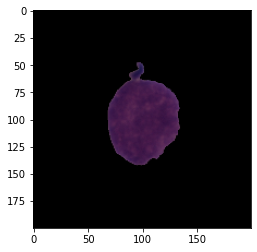

You have leukemia


In [12]:
dir_path = "C-NMC_Leukemia/testing_data/C-NMC_test_final_phase_data"

for i in os.listdir(dir_path):
    img = image.load_img(dir_path + "//" + i, target_size=(200, 200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("You do not have leukemia")
    else:
        print("You have leukemia")
    break

In [13]:
print(train_dataset.class_indices)
classes = ["You do not have leukemia", "You have leukemia"]

{'all': 0, 'hem': 1}


### Creating GUI Application

In [14]:
root = tk.Tk()  # Initializing class
root.title("C3BO: Cancer Blood Oncologist")
root.geometry("2000x2000")

''

In [15]:
greetingC3BO = "Hello there! I am C3BO\n"
greetingC3BO += "Using Convolutional Neural Networks, my brilliant\n creator Leonardo Amatoregis de Farias\n"
greetingC3BO += "trained me to predict blood cancer"

phrasesC3BO = [
    "Is that a nice hat you've got?",
    "Wonderful weather we are having is it not?",
    "Did you know that I am fluent in over six million forms of communication",
    "I enjoy listening to the sound of rain",
    "Do you know what a sigmoid function is?",
    "Water and metal mix rather curiously..."
]

In [16]:
# GUI Properties
WIDTH, HEIGHT = 300, 300
DEFAULTCOLOR = "#f25f55"

In [17]:
def showRobot():
    robImgLabel = tk.Label(root, bg=DEFAULTCOLOR)
    robImgLabel.place(relx=0.1, rely=0.4)  #robImgLabel.pack(side=tk.LEFT, anchor="sw", pady=100)

    uploaded = Image.open("C3BO.png")
    uploaded = uploaded.resize((261, 320))
    robImg = ImageTk.PhotoImage(uploaded)
    robImgLabel.configure(image=robImg)
    robImgLabel.image = robImg

In [18]:
bg = tk.Label(root, bg=DEFAULTCOLOR)
bg.place(relwidth=1, relheight=1)

sign_image = tk.Label(root, bg=DEFAULTCOLOR)
sign_image.place(relx=0.5, rely=0.5, anchor=tk.CENTER)

clfLabel = tk.Label(root, font=("Rockwell Condensed", 20),
                    text=greetingC3BO, bg="#d9cb96", fg="#6e5907")
clfLabel.pack(side=tk.LEFT, anchor="nw", pady=145)

In [19]:
actual_filepath = None

def uploadImage():
    global actual_filepath
    Image_Width = 200
    Image_Height = 200
    Image_Size = (Image_Width, Image_Height)
    curr_file = None

    actual_filepath = filedialog.askopenfilename()
    print(actual_filepath)
    
    def iterateThroughFile():
        try:
            curr_file = np.random.randint(1, 200)
            file_path = dir_path + "//" + str(curr_file) + ".bmp"
            uploaded = Image.open(file_path)
            uploaded.thumbnail(Image_Size)
            im = ImageTk.PhotoImage(uploaded)
            sign_image.configure(image=im)
            sign_image.image = im
        except Exception as e:
            print(e)
#         root.after(25, iterateThroughFile)
    
    iterateThroughFile()

In [20]:
def classifyImage():
    img = image.load_img(actual_filepath, target_size=(200, 200))
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    print(f"Patient {actual_filepath} {classes[int(val)]}")
    clfLabel.config(text=classes[int(val)])

In [21]:
def exitProgram():
    exit_button = tk.Button(root, bg="cyan", text="Exit", command=root.destroy) 
    exit_button.place(relx=0.8, rely=0.0, relwidth=0.15, relheight=0.1)

In [22]:
uploadImgButton = tk.Button(root, text="upload image",
                            bg="#f0b8b4", activebackground="#d4a29f", command=uploadImage)
uploadImgButton.pack(side=tk.BOTTOM, pady=50)

classifyImgButton = tk.Button(root, text="classify image",
                              bg="#f0b8b4", command=classifyImage)
classifyImgButton.place(relx=0.79,rely=0.46)

showRobot()
exitProgram()

In [23]:
flpth = "C-NMC_Leukemia/testing_data/C-NMC_test_final_phase_data"
full = glob.glob(flpth + "//" + "1.bmp")
full

['C-NMC_Leukemia/testing_data/C-NMC_test_final_phase_data//1.bmp']

In [24]:
def main():
    root.mainloop()

In [25]:
main()

C:/Users/leode/C-NMC_Leukemia/testing_data/C-NMC_test_final_phase_data/8.bmp
Patient C:/Users/leode/C-NMC_Leukemia/testing_data/C-NMC_test_final_phase_data/8.bmp You have leukemia
C:/Users/leode/C-NMC_Leukemia/testing_data/C-NMC_test_final_phase_data/9.bmp
Patient C:/Users/leode/C-NMC_Leukemia/testing_data/C-NMC_test_final_phase_data/9.bmp You have leukemia


In [26]:
train_dataset.class_indices

{'all': 0, 'hem': 1}

### Plotting both the training and validation accuracy

In [27]:
model_fit.history

{'loss': [1.0469669103622437,
  0.5914564728736877,
  0.5663458108901978,
  0.6104210615158081,
  0.6115512847900391,
  0.3406863510608673,
  0.6014813184738159,
  0.2993161082267761,
  0.478984534740448,
  0.477760910987854,
  0.45856723189353943,
  0.4467586576938629,
  0.7124108076095581,
  0.4848019480705261,
  0.3682847321033478,
  0.6093093156814575,
  0.4622076451778412,
  0.5434808135032654,
  0.4631587266921997,
  0.4059748947620392,
  0.7068912982940674,
  0.48794955015182495,
  0.5081198811531067,
  0.358613520860672,
  0.4183194637298584,
  0.5223804712295532,
  0.5295870304107666,
  0.3953782320022583,
  0.641495943069458,
  0.5074658393859863,
  0.33068203926086426,
  0.4557282626628876,
  0.5235757231712341,
  0.45614293217658997,
  0.5475324392318726,
  0.499533087015152,
  0.48499739170074463,
  0.5028566122055054,
  0.5347884893417358,
  0.5024392008781433,
  0.41743332147598267,
  0.5275909304618835,
  0.4837116301059723,
  0.5013781189918518,
  0.48239925503730774,


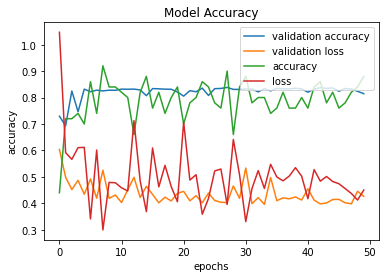

In [29]:
plt.title("Model Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(model_fit.history["val_accuracy"], label="validation accuracy")
plt.plot(model_fit.history["val_loss"], label="validation loss")
plt.plot(model_fit.history["accuracy"], label="accuracy")
plt.plot(model_fit.history["loss"], label="loss")
plt.legend(loc="upper right")
plt.savefig("acc.png")
plt.show()